# Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_parquet('smoking_driking_dataset_Ver01.parquet')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


<h4> Defining categorical columns, numerical columns and features : </h4>

In [ ]:
categorical_columns = [feature for feature in df.columns if df[feature].dtypes =='O']
categorical_columns

['sex', 'DRK_YN']

In [ ]:
numerical_columns=[feature for feature in df.columns if df[feature].dtypes !='O']
numerical_columns.pop(-1)
features=numerical_columns+categorical_columns
features

['age',
 'height',
 'weight',
 'waistline',
 'sight_left',
 'sight_right',
 'hear_left',
 'hear_right',
 'SBP',
 'DBP',
 'BLDS',
 'tot_chole',
 'HDL_chole',
 'LDL_chole',
 'triglyceride',
 'hemoglobin',
 'urine_protein',
 'serum_creatinine',
 'SGOT_AST',
 'SGOT_ALT',
 'gamma_GTP',
 'sex',
 'DRK_YN']

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for cat in categorical_columns:
    le = preprocessing.LabelEncoder()
    le.fit(list(df[cat]))
    df[cat+'_pre'] = df[cat].apply(lambda x: le.transform([x])[0])
    print(df[[cat, cat + '_pre']])

           sex  sex_pre
0         Male        1
1         Male        1
2         Male        1
3         Male        1
4         Male        1
...        ...      ...
991341    Male        1
991342    Male        1
991343  Female        0
991344    Male        1
991345    Male        1

[991346 rows x 2 columns]
       DRK_YN  DRK_YN_pre
0           Y           1
1           N           0
2           N           0
3           N           0
4           N           0
...       ...         ...
991341      N           0
991342      N           0
991343      Y           1
991344      N           0
991345      Y           1

[991346 rows x 2 columns]


<h4>We have two column with having categorical value, So mappping their value to binary 0 and 1: </h4>



In [ ]:
# Encoding 'sex' to 0, 1

df.replace({'sex': {'Male': 0, 'Female': 1}}, inplace = True)
df['sex'].value_counts()

0    526415
1    464931
Name: sex, dtype: int64

In [ ]:
# Encoding 'DRK_YN' to 0, 1

df.replace({'DRK_YN':{'Y':1, 'N':0}}, inplace = True)
df['DRK_YN'].value_counts()

0    495858
1    495488
Name: DRK_YN, dtype: int64

<h4> Finding the mean value of each attribute for Drinker and Non-drinker accordingly. </h4>

In [ ]:
df.groupby('DRK_YN').mean()

<ipython-input-24-1216d6f0a498>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('DRK_YN').mean()


,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,sex_pre,DRK_YN_pre
DRK_YN,,,,,,,,,,,,,,,,,,,,,
N,51.648809,158.764848,59.977998,80.131769,0.933964,0.933205,1.041679,1.040481,121.950591,75.055403,...,121.476582,13.755567,1.095592,0.831262,25.064444,24.100658,26.798521,1.321110,0.347071,0.0
Y,43.577160,165.718998,66.592571,82.335770,1.027740,1.023687,1.021302,1.020463,122.914765,77.050597,...,142.814884,14.704434,1.092856,0.889693,26.914864,27.410680,47.481893,1.895348,0.715087,1.0


<h4> Splitting the dataset into Test and Train </h4>




In [ ]:
y = df['DRK_YN']
x = df.drop('DRK_YN',axis=1)
ss = StandardScaler()
scale = ['age','height','weight','SBP','DBP','tot_chole','hemoglobin']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
xtrain[scale] = ss.fit_transform(xtrain[scale])
xtrain.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,sex_pre,DRK_YN_pre
751370,Female,0.521341,-0.780172,-0.262859,93.0,0.7,0.9,1.0,1.0,-0.855134,...,90.0,-0.649250,1.0,1.0,34.0,62.0,51.0,2.0,0,0
823097,Female,1.226365,-1.318696,-0.662518,82.0,0.8,0.7,1.0,1.0,0.520226,...,101.0,-1.658281,1.0,0.8,28.0,19.0,18.0,1.0,0,0
439934,Female,0.168829,0.296875,-0.262859,78.4,1.2,1.0,1.0,1.0,-0.511294,...,103.0,-1.279895,1.0,0.7,26.0,25.0,33.0,1.0,0,0
242598,Male,1.226365,-0.241649,-0.662518,86.0,0.8,0.8,1.0,1.0,-0.167454,...,166.0,-1.595217,1.0,1.0,27.0,21.0,17.0,3.0,1,1
346295,Female,-0.536195,-0.241649,-0.262859,69.0,1.5,1.5,1.0,1.0,0.520226,...,84.0,-2.162797,1.0,0.6,20.0,9.0,10.0,1.0,0,0


In [ ]:
xtest[scale] = ss.fit_transform(xtest[scale])
xtest.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,sex_pre,DRK_YN_pre
676014,Female,-0.185945,-0.240719,-0.261414,85.0,1.2,1.0,1.0,1.0,-0.648022,...,64.0,-0.587789,1.0,0.8,16.0,13.0,14.0,1.0,0,0
958905,Male,-1.244124,1.375835,0.537147,87.0,0.9,0.9,1.0,1.0,0.864358,...,127.0,1.054484,2.0,1.2,24.0,28.0,16.0,1.0,1,0
472540,Male,-0.891398,1.914687,1.734989,93.0,1.2,1.5,1.0,1.0,0.451891,...,204.0,1.496635,1.0,1.0,34.0,61.0,25.0,2.0,1,0
244194,Male,-0.891398,1.375835,1.335708,89.0,1.5,1.5,1.0,1.0,-0.235554,...,50.0,0.612334,1.0,0.9,18.0,17.0,17.0,1.0,1,1
88447,Female,-0.538671,-0.240719,0.537147,97.0,1.5,1.0,1.0,1.0,0.108168,...,81.0,-0.903611,1.0,0.5,15.0,17.0,14.0,1.0,0,0


<h4> Let us define the Correlation among features: </h4>





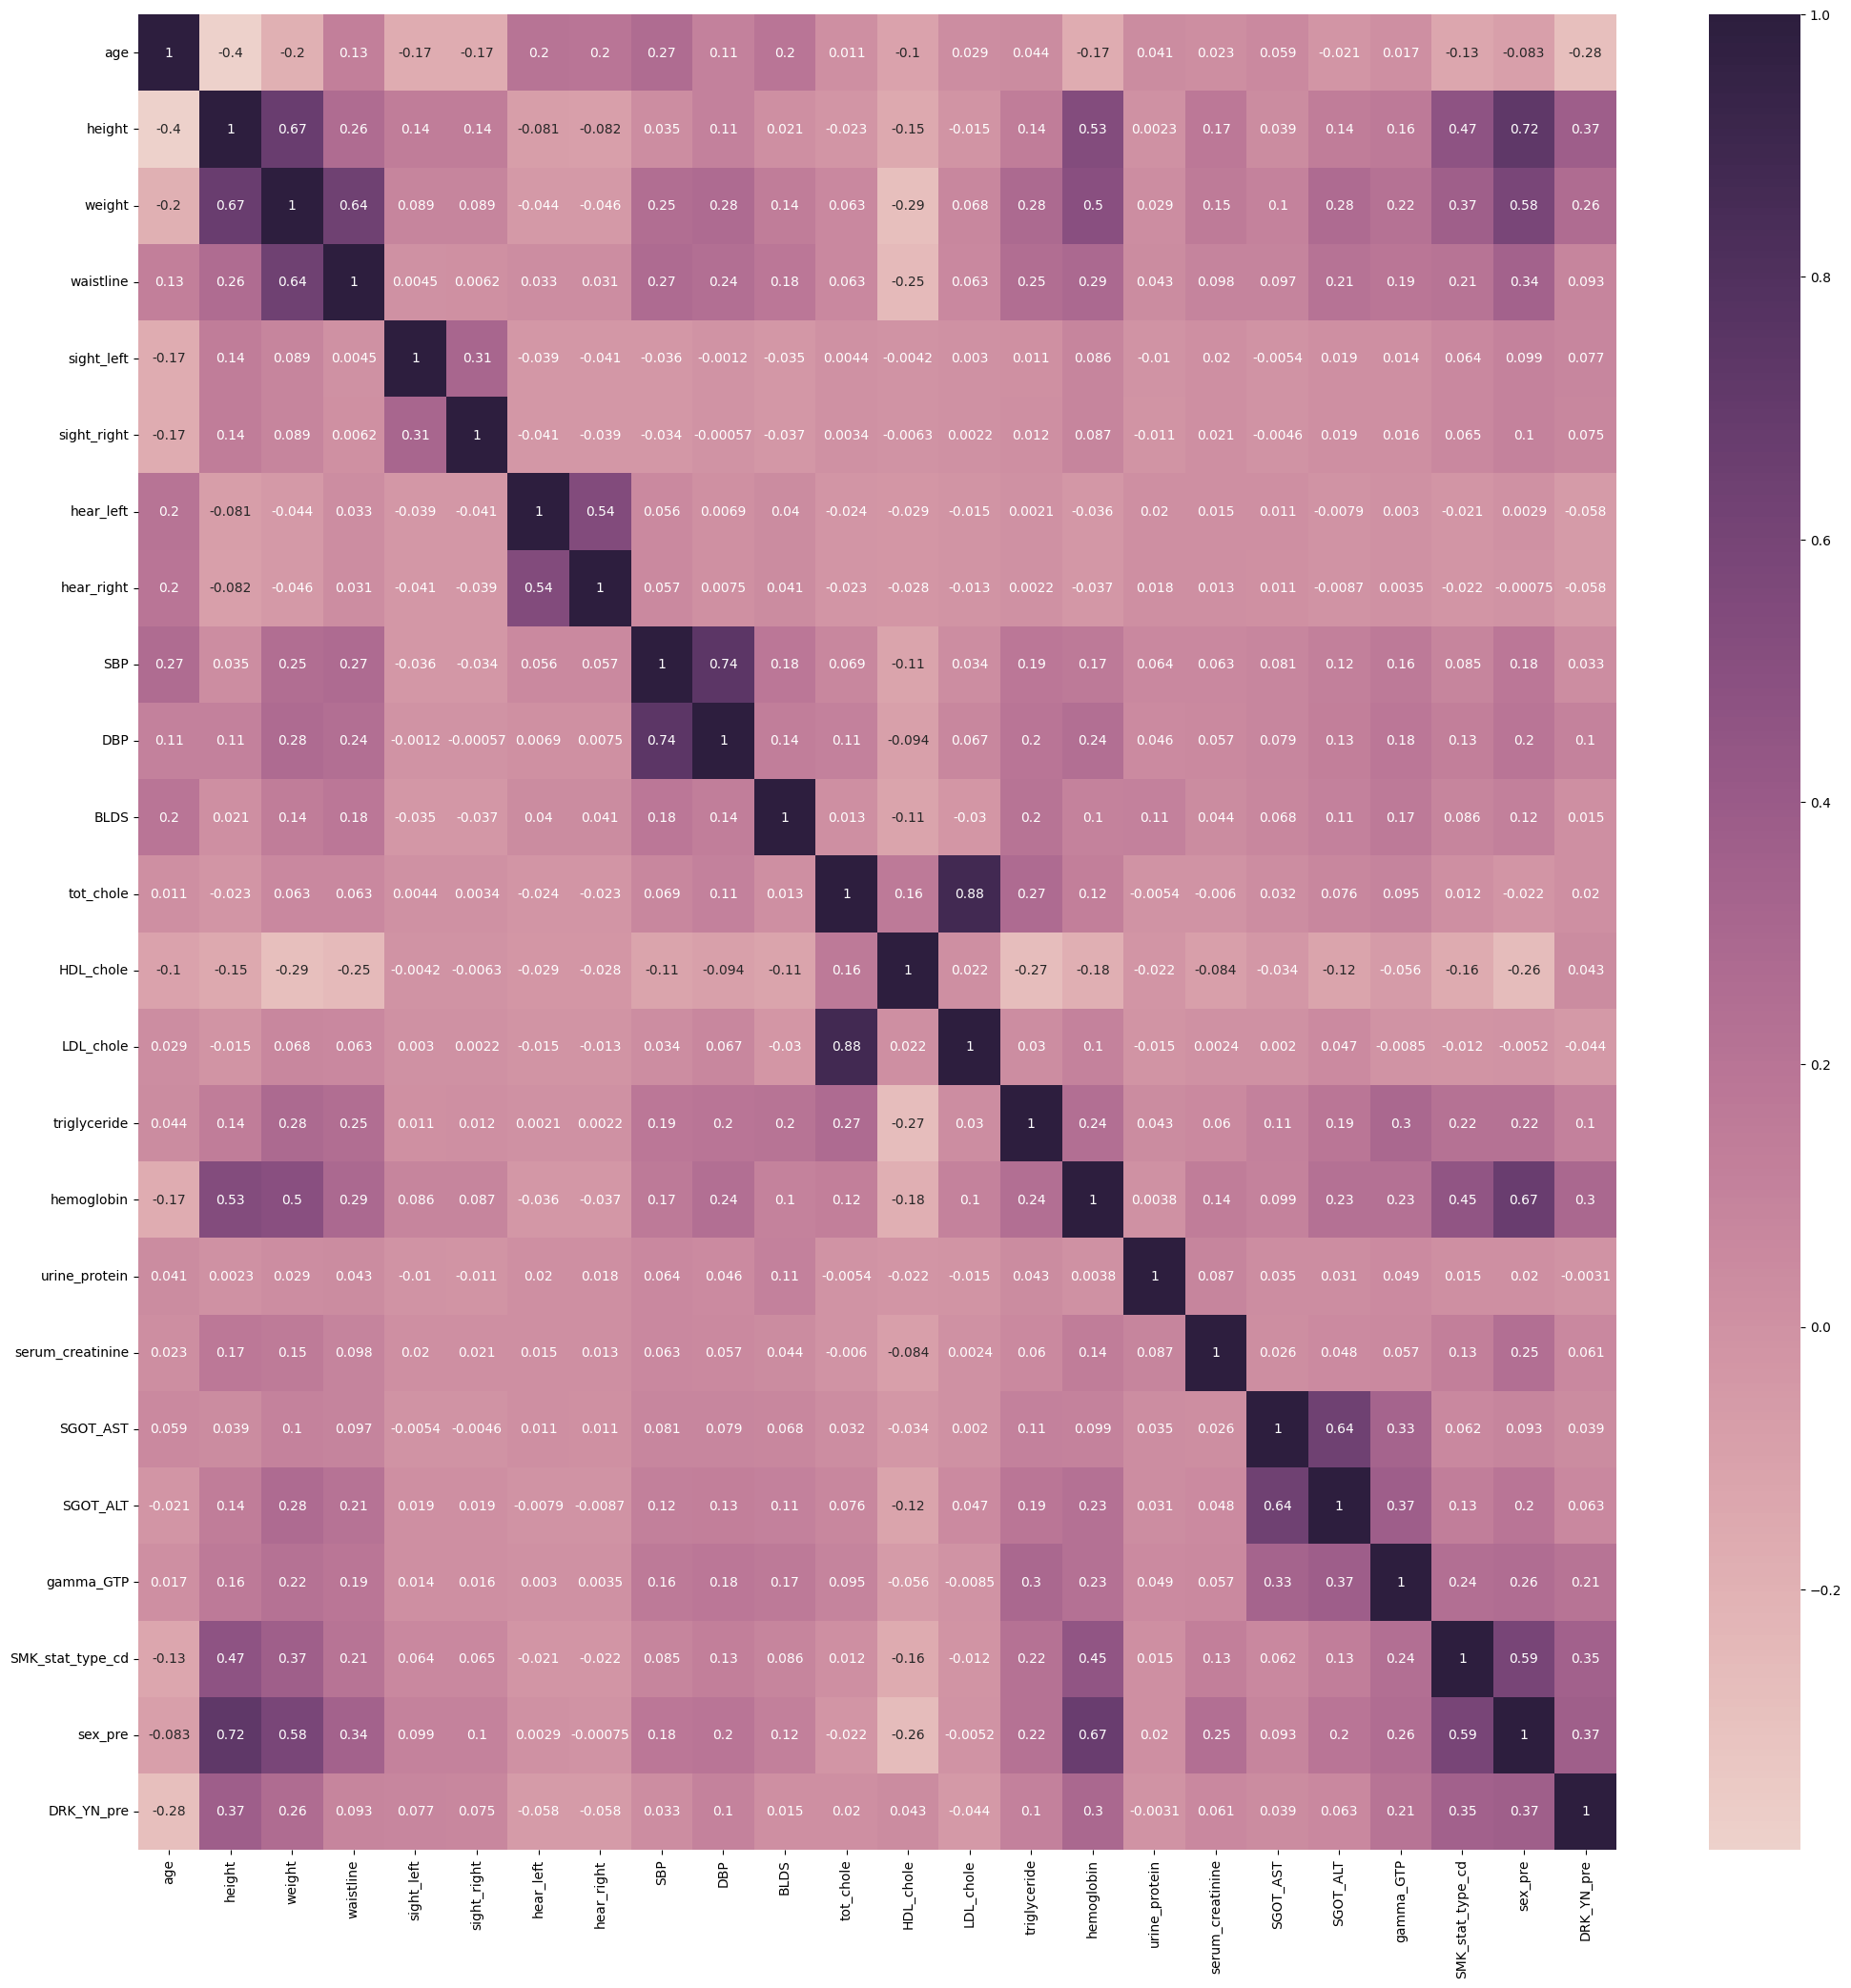

In [ ]:
#heat-map
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()